In [94]:
import uproot
import numpy as np
import ROOT
import itertools
from array import array
ROOT.gROOT.SetStyle('ATLAS')
import time

In [73]:
def draw_note(x, y, text, size=12, font=63):
    l = ROOT.TLatex()
    l.SetNDC()
    l.SetTextColor(1)
    l.DrawLatex(x, y, text)

def atlas_label(x, y, text=None, color=1):
    draw_note(x, y, r"#bf{#it{ATLAS}} " + text)


In [103]:
# https://cds.cern.ch/record/2267569/files/ATL-COM-PHYS-2017-701.pdf
# Step# 2: A number of rDV bins are also defined (not as per the radial region divisions). Total number of
# rDV bins is 15. Each bin has a uniform width of 20 mm except for the last bin (# 15), which is 16 mm wide.
# The rDV region covered in total is 4-300 mm
bins = [4, 24, 44, 64, 84, 104, 124, 144, 164, 184, 204, 224, 244, 264, 284] # int note bins # why start at 4? I get it the IBL, but what about closer vertices?
# bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300] # sensible bins?
# np.histogram(dv_r.array(), bins=bins)
def make_comparison_plot(pt_bin):
    hist_markers = itertools.cycle([22,21,33,29,30,31,32,34,35])
    hist_colors = itertools.cycle([ROOT.kAzure+6, ROOT.kViolet+8, ROOT.kRed, ROOT.kGreen+1, ROOT.kOrange -3])
    tree_name = 'ntuples_VSI_2'
    var = 'ntup_sel_DV_r_VSI_2'
    cutvar = 'ntup_sel_DV_sum_track_pt_VSI_2'
    cutmin = pt_bin[0]
    cutmax = pt_bin[1]
    bin_string = "{}_{}".format(cutmin, cutmax).replace('.', 'p')
    # Open file
    tfiles = {'data': ROOT.TFile('/data/hnl/KShort/SUSY15/data_histograms/histograms_data_kshort.root'),
              'mc': ROOT.TFile('/data/hnl/KShort/SUSY15/dijet_histograms/CR_histograms_mc_kshort.root')}
    # Load tree from file
    c = None
    scale = 0.75
    c = ROOT.TCanvas("c"+bin_string, "", int(1200*scale), int(800*scale))
    ttree = {'data': tfiles['data'].Get(tree_name),
             'mc':  tfiles['mc'].Get(tree_name)}

    # Define histograms
    rdv = {'data': ROOT.TH1D('rdv_data'+bin_string,'Displaced Vertex Radius', len(bins)-1, array('d', bins)),
           'mc': ROOT.TH1D('rdv_mc'+bin_string,'Displaced Vertex Radius', len(bins)-1, array('d', bins))}

    # Fill histograms from ntuple. goff indicates not to draw.
    print(f'{cutmax}>{cutvar}>{cutmin}')
    ttree['data'].Draw(f'{var}>>rdv_data'+bin_string,f'{cutvar}>{cutmin} && {cutvar}<{cutmax}','goff')
    ttree['mc'].Draw(f'{var}>>rdv_mc'+bin_string,f'{cutvar}>{cutmin} && {cutvar}<{cutmax}','goff')

    # Set draw properties
    for key, hist in rdv.items():
        hist.GetXaxis().SetTitle("Displaced vertex radius [mm]")
        hist.GetYaxis().SetTitle("Vertices (normalized to first DVr region)")
        hist.SetMarkerSize(1.5*scale)
        hist.SetLineWidth(int(3*scale))
    rdv['data'].SetLineColor(ROOT.kBlack)
    rdv['data'].SetMarkerColor(ROOT.kBlack)
    rdv['data'].SetMarkerStyle(next(hist_markers))
    hcolor = next(hist_colors)
    rdv['mc'].SetLineColor(hcolor)
    rdv['mc'].SetMarkerColor(hcolor)
    rdv['mc'].SetMarkerStyle(next(hist_markers))

    # format legend
    x = 0.6
    y = 0.8
    leg = ROOT.TLegend(x, y, 0.91, 0.91)
    leg.SetTextSize(0.035)
    leg.SetBorderSize(0)
    leg.SetFillColor(ROOT.kWhite)
    leg.SetShadowColor(ROOT.kWhite)
    leg.AddEntry(rdv['data'], 'Data', "lp")
    leg.AddEntry(rdv['mc'], 'Dijet JZ4W', "lp")

    # Draw the histograms
    rdv['mc'].DrawNormalized('E0 HIST SAME', 1)
    rdv['data'].DrawNormalized('E0 HIST SAME', 1)
    leg.Draw("SAME")
    dy = .07
    draw_note(x, y-dy, f'VSIKShort bin [{cutmin},{cutmax}]')
    draw_note(x, y-2*dy, 'Selected K_{S}^{0}')
    atlas_label(x,y-3*dy, 'Internal')

    c.SetLogy()
    c.Draw()
    output_dir = "/data/hnl/KShort/SUSY15/plots/"
    c.SaveAs(f'{output_dir}vertex_comparison_{bin_string}.png')
    del c
#     time.sleep(20)


pt_bins = [0, 2, 2.5, 3, 4, 6, 8, 10]
for pt_bin in zip(pt_bins, pt_bins[1:]):
    make_comparison_plot(pt_bin)

2>ntup_sel_DV_sum_track_pt_VSI_2>0
2.5>ntup_sel_DV_sum_track_pt_VSI_2>2
3>ntup_sel_DV_sum_track_pt_VSI_2>2.5
4>ntup_sel_DV_sum_track_pt_VSI_2>3
6>ntup_sel_DV_sum_track_pt_VSI_2>4
8>ntup_sel_DV_sum_track_pt_VSI_2>6
10>ntup_sel_DV_sum_track_pt_VSI_2>8


Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: rdv_mc0_2
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: rdv_data0_2
Info in <TCanvas::Print>: png file /data/hnl/KShort/SUSY15/plots/vertex_comparison_0_2.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/SUSY15/plots/vertex_comparison_2_2p5.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/SUSY15/plots/vertex_comparison_2p5_3.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/SUSY15/plots/vertex_comparison_3_4.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/SUSY15/plots/vertex_comparison_4_6.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/SUSY15/plots/vertex_comparison_6_8.png has been created
Info in <TCanvas::Print>: png file /data/hnl/KShort/SUSY15/plots/vertex_comparison_8_10.png has been created


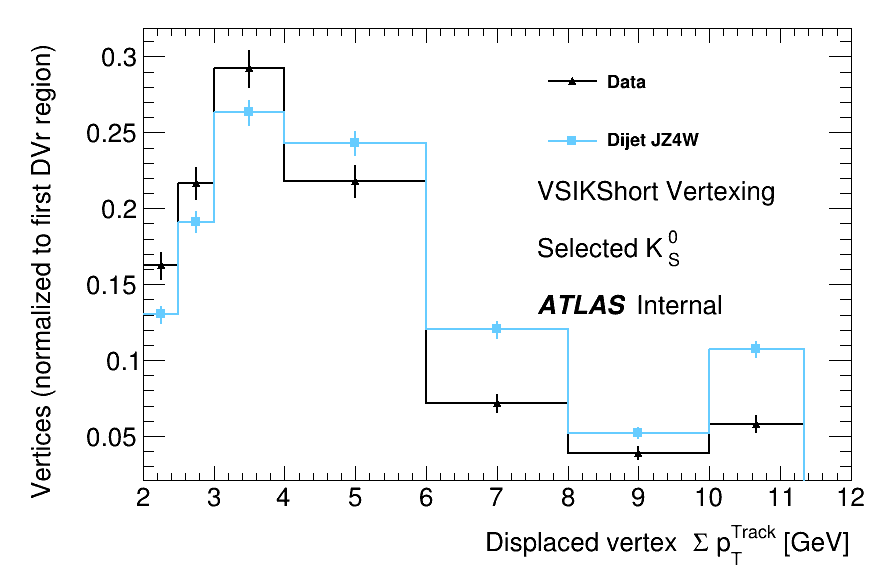

In [54]:
bins = [2, 2.5, 3, 4, 6, 8, 10]
hist_markers = itertools.cycle([22,21,33,29,30,31,32,34,35])
hist_colors = itertools.cycle([ROOT.kAzure+6, ROOT.kViolet+8, ROOT.kRed, ROOT.kGreen+1, ROOT.kOrange -3])
tree_name = 'ntuples_VSI_2'
var = 'ntup_sel_DV_sum_track_pt_VSI_2'
# Open file
tfiles = {'data': ROOT.TFile('/data/hnl/KShort/SUSY15/data_histograms/histograms_data_kshort.root'),
          'mc': ROOT.TFile('/data/hnl/KShort/SUSY15/dijet_histograms/CR_histograms_mc_kshort.root')}
# Load tree from file
c = None
scale = 0.75
c = ROOT.TCanvas("c", "", int(1200*scale), int(800*scale))
ttree = {'data': tfiles['data'].Get(tree_name),
         'mc':  tfiles['mc'].Get(tree_name)}

# Define histograms
rdv = {'data': ROOT.TH1D('rdv_data','Displaced Vertex Radius', len(bins)-1, array('d', bins)),
       'mc': ROOT.TH1D('rdv_mc','Displaced Vertex Radius', len(bins)-1, array('d', bins))}

# Fill histograms from ntuple. goff indicates not to draw.
ttree['data'].Draw(f'{var}>>rdv_data','','goff')
ttree['mc'].Draw(f'{var}>>rdv_mc','','goff')

# Set draw properties
for key, hist in rdv.items():
    hist.GetXaxis().SetTitle("Displaced vertex #Sigma p_{T}^{Track} [GeV]")
    hist.GetYaxis().SetTitle("Vertices (normalized to first DVr region)")
    hist.SetMarkerSize(1.5*scale)
    hist.SetLineWidth(int(3*scale))
    hist.GetXaxis().SetRange(1, hist.GetNbinsX() + 1);
rdv['data'].SetLineColor(ROOT.kBlack)
rdv['data'].SetMarkerColor(ROOT.kBlack)
rdv['data'].SetMarkerStyle(next(hist_markers))
hcolor = next(hist_colors)
rdv['mc'].SetLineColor(hcolor)
rdv['mc'].SetMarkerColor(hcolor)
rdv['mc'].SetMarkerStyle(next(hist_markers))

# format legend
x = 0.6
leg = ROOT.TLegend(x, 0.7, 0.91, 0.91)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
leg.SetFillColor(ROOT.kWhite)
leg.SetShadowColor(ROOT.kWhite)
leg.AddEntry(rdv['data'], 'Data', "lp")
leg.AddEntry(rdv['mc'], 'Dijet JZ4W', "lp")

# Draw the histograms
rdv['data'].DrawNormalized('E0 HIST SAME', 1)
rdv['mc'].DrawNormalized('E0 HIST SAME', 1)
leg.Draw("SAME")
draw_note(x, .65, 'VSIKShort Vertexing')
draw_note(x, .55, 'Selected K_{S}^{0}')
atlas_label(x,.45, 'Internal')

# c.SetLogy()
c.Draw()
